#**project 2 Global Terrorism Data Analysis**

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load dataset
df = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1',low_memory=False)

In [ ]:
# Select relevant columns
columns = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city',
           'latitude', 'longitude', 'attacktype1_txt', 'targtype1_txt',
           'weaptype1_txt', 'gname', 'nkill', 'nwound']
df = df[columns]

In [ ]:
# Clean missing values
df.dropna(subset=['latitude', 'longitude'], inplace=True)
df.fillna(0, inplace=True)


In [ ]:
# Explore Dataset
print(df.head())
print(df.info())

   iyear  imonth  iday         country_txt                   region_txt  \
0   1970       7     2  Dominican Republic  Central America & Caribbean   
1   1970       0     0              Mexico                North America   
2   1970       1     0         Philippines               Southeast Asia   
3   1970       1     0              Greece               Western Europe   
4   1970       1     0               Japan                    East Asia   

            city   latitude   longitude                 attacktype1_txt  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

                 targtype1_txt weaptype1_txt  \
0  Private Citizens & Property       Unknown   
1 

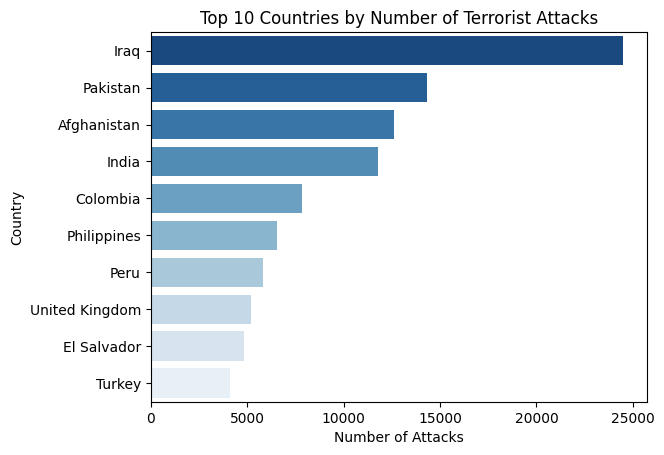

In [ ]:
#checking countries with highest number of terrorist attacks
top_countries = df['country_txt'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')
plt.title('Top 10 Countries by Number of Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.show()


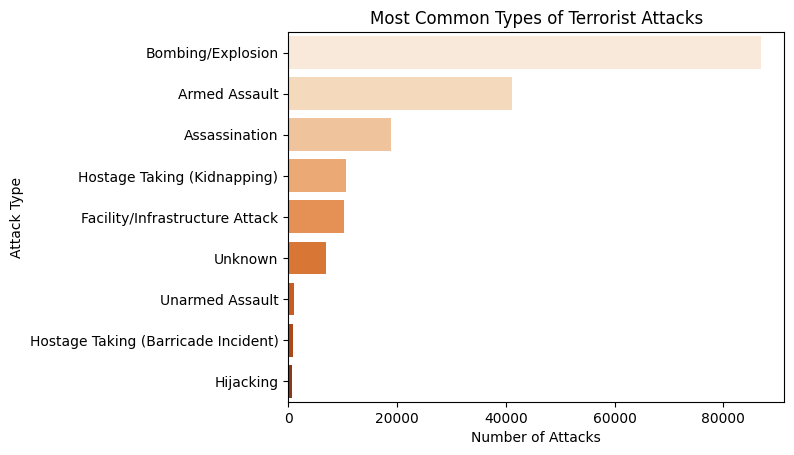

In [ ]:
#checking most common type of terrorist attacks
attack_types = df['attacktype1_txt'].value_counts().head(10)
sns.barplot(x=attack_types.values, y=attack_types.index, palette='Oranges')
plt.title('Most Common Types of Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()


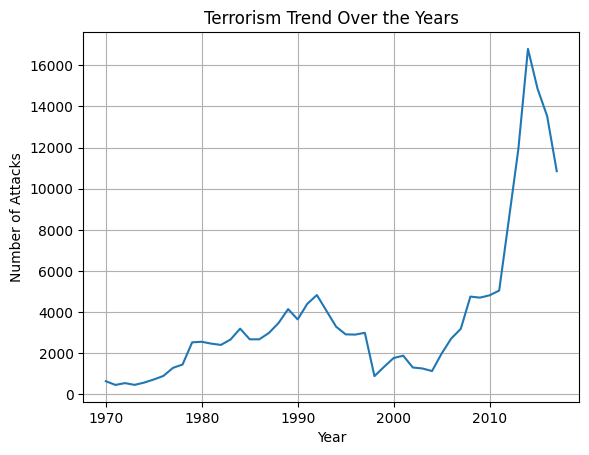

In [ ]:
#checking terrorism increase or decrease over the years
yearly_trend = df['iyear'].value_counts().sort_index()
plt.plot(yearly_trend.index, yearly_trend.values)
plt.title('Terrorism Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()



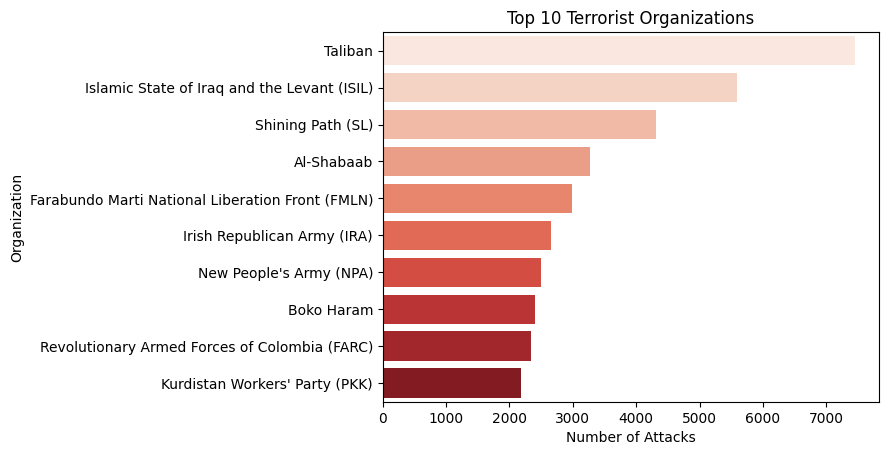

In [ ]:
#finding out which terrorist are most active
top_groups = df['gname'].value_counts().drop('Unknown').head(10)
sns.barplot(x=top_groups.values, y=top_groups.index, palette='Reds')
plt.title('Top 10 Terrorist Organizations')
plt.xlabel('Number of Attacks')
plt.ylabel('Organization')
plt.show()


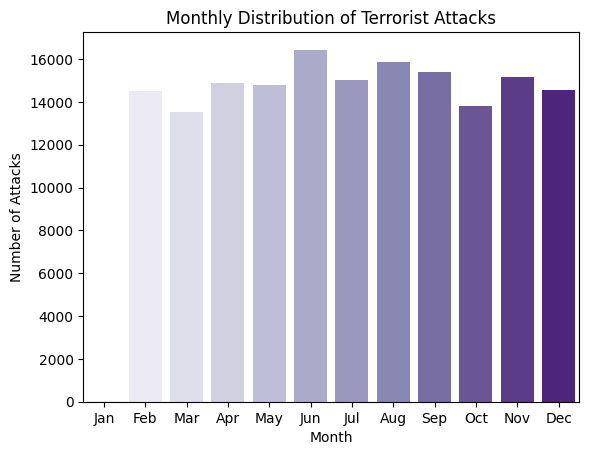

In [ ]:
#checking for seasonal trends in terrorist attacks
monthly_attacks = df['imonth'].value_counts().sort_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x=months, y=monthly_attacks.values[:12], palette='Purples')
plt.title('Monthly Distribution of Terrorist Attacks')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
#seeing which terrorist group dominates nigeria the most
nigeria_data = df[df['country_txt'] == 'Nigeria']
top_nigeria_group = nigeria_data['gname'].value_counts().drop('Unknown').head(1)
top_nigeria_group


,count
gname,
Boko Haram,2083


In [ ]:
#from the up analysis, checking what its greatest target
dominant_group = top_nigeria_group.index[0]
targets = nigeria_data[nigeria_data['gname'] == dominant_group]['targtype1_txt'].value_counts()
targets.head(1)

,count
targtype1_txt,
Private Citizens & Property,937


In [ ]:
#viewing the map for the global terrorist acttacks
map_data = df[['latitude', 'longitude']]
map_data.dropna(inplace=True)
heat_map = folium.Map()
HeatMap(map_data.values.tolist(), radius=4).add_to(heat_map)
heat_map.save('terrorism_heatmap.html')
print('Heatmap saved as terrorism_heatmap.html')

Heatmap saved as terrorism_heatmap.html


In [ ]:
map_data = df[['latitude', 'longitude']]
map_data.dropna(inplace=True)
heat_map = folium.Map()

In [ ]:
map_data.dropna(inplace=True)

In [ ]:
data=map_data.values.tolist()